<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/Week_5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 Assignment: Holdout, Build the model

-----

## <font color="blue"> Question 0
    
**문제:** mnist data를 불러오시오

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 165.1 MB 65 kB/s  eta 0:00:01    |███████████████████▎            | 99.5 MB 425 kB/s eta 0:02:35     |████████████████████████████▉   | 148.7 MB 374 kB/s eta 0:00:44
     |████████████████████████████████| 3.0 MB 460 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 468 kB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
     |████████████████████████████████| 28.4 MB 258 kB/s eta 0:00:01     |██████████████████████████      | 23.0 MB 311 kB/s eta 0:00:18
  Using cached absl_py-0.10.0-py3-none-any.whl (127 kB)
     |████████████████████████████████| 1.3 MB 186 kB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
(X, y), (X_test, y_test) = mnist.load_data()
### END CODE HERE ###

11493376/11490434 [==============================] - 0s 0us/step


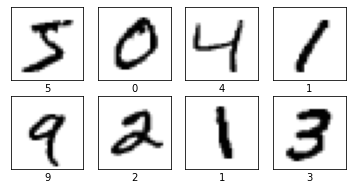

In [ ]:
plt.figure(figsize=(6,3))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(y[i]))
plt.show()

5041

9213

이 나오는지 확인하기

-------

## <font color="blue"> Question 1
    
**문제:** slicing 기법을 사용하여 X_test와 y_test를 7:3으로 split 하시오
    
(X_half1은 앞에서부터 7000개, X_half2는 뒤에서부터 3000개로 split한다. y도 마찬가지로 split한다.)

In [ ]:
X_test.shape
y_test.shape

(10000,)

In [ ]:
### START CODE HERE ### (≈ 4 line of code)
X_half1 = X_test[:7000]
X_half2 = X_test[7000:]
y_half1 = y_test[:7000]
y_half2 = y_test[7000:]
### END CODE HERE ###

In [ ]:
assert(X_half1.shape == (7000,28,28))
assert(X_half2.shape == (3000,28,28))
assert((y_half1[0] + y_half2[0]) == 8)

error가 나지 않는다면 정답입니다.

-------

## <font color="blue"> Question 2

**소문제1:** train_test_split 함수를 import 해오시오.    
    
**소문제2:** train_test_split 기법을 사용하여 X, y에서 validation set을 15000개 확보하시오.
    
(RandomState는 3으로 설정하고 shuffle은 진행하지 않는다.)
    
(argument는 train_size 말고 test_size를 이용한다.)

In [ ]:
# 소문제 1

### START CODE HERE ### (≈ 1 line of code)
from sklearn.model_selection import train_test_split
### END CODE HERE ###

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=3, shuffle=False)
### END CODE HERE ###

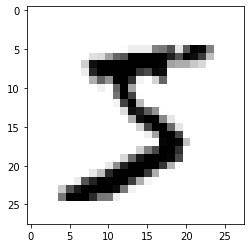

In [ ]:
assert(X_val.shape == (15000, 28, 28))
plt.imshow(X_train[0], cmap=plt.cm.binary)

그림이 5가 그려지면 성공

---------

## <font color="blue"> Question 3
    
**문제:** slack에 올린 모델을 직접 만들어 보시오.
    
**소문제1:** Sequential를 import 해오시오.
    
**소문제2:** Dense를 import 해오시오.
    
**소문제3:** add 메소드를 이용해서 모델을 만드시오.

In [ ]:
# 소문제 1

### START CODE HERE ### (≈ 1 line of code)
from tensorflow.keras.models import Sequential
### END CODE HERE ###

In [ ]:
# 소문제 2

### START CODE HERE ### (≈ 1 line of code)
from tensorflow.keras.layers import Dense
### END CODE HERE ###

In [ ]:
# 소문제 3 (자유롭게 만들어보기)

model = Sequential()
### START CODE HERE ### 
model.add(Dense(128, activation= 'relu', input_shape = (784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
### END CODE HERE ###

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 109,397
Trainable params: 109,397
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_shape =(3,)))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])